In [ ]:
predict 0과 1의 분포 분석

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
output = pd.read_csv('/opt/ml/code/output/output14.csv')

In [16]:
output_dh1 = pd.read_csv('/opt/ml/code/output/output_dh.csv')

In [5]:
output

,id,prediction
0,0,0.659255
1,1,0.753035
2,2,0.217752
3,3,0.693677
4,4,0.268250
...,...,...
739,739,0.080192
740,740,0.746853
741,741,0.837632
742,742,0.695769


In [6]:
def rating(output):
    if output['prediction'] >= 0.5 :
        return 1
    else:
        return 0

output['ans'] = output.apply(rating, axis=1)

In [7]:
output

,id,prediction,ans
0,0,0.659255,1
1,1,0.753035,1
2,2,0.217752,0
3,3,0.693677,1
4,4,0.268250,0
...,...,...,...
739,739,0.080192,0
740,740,0.746853,1
741,741,0.837632,1
742,742,0.695769,1


In [17]:
output_dh1['ans'] = output_dh1.apply(rating, axis=1)
output_dh1.head()

,id,prediction,ans
0,0,0.681681,1
1,1,0.800659,1
2,2,0.232801,0
3,3,0.687319,1
4,4,0.263985,0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


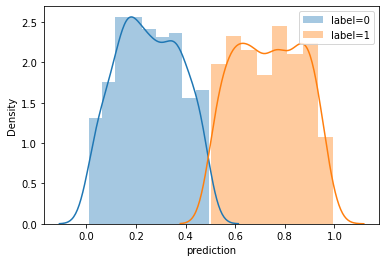

In [15]:
sns.distplot(output[output['ans']==0]['prediction'], label='label=0')
sns.distplot(output[output['ans']==1]['prediction'], label='label=1')

plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


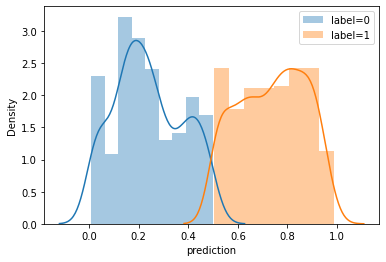

In [18]:
sns.distplot(output_dh1[output_dh1['ans']==0]['prediction'], label='label=0')
sns.distplot(output_dh1[output_dh1['ans']==1]['prediction'], label='label=1')

plt.legend()
plt.show()

In [ ]:
import os,gc
from collections import defaultdict

#폴드 개수만큼 user를 쪼갠 목록을 만든다
def lgbm_oof_split_data_withidx(n_fold, df):
    #grade별로 user list 생성 (9개)
    u_g = df.groupby(['userID','user_grade'])['userID'].count().reset_index(name='cnt')   #user별 grade값
    users = [[] for _ in range(10)]  #grade개수총 9개

    for id in u_g['userID']:
        id_grade = int(u_g[u_g['userID'] == id]['user_grade'])  #해당 유저의 grade
        id_cnt = int(u_g[u_g['userID'] == id]['cnt'])
        users[id_grade].append((id, id_cnt))
    
    # grade별로 sorted
    for i in range(1,10):
        user_list = users[i]
        user_list = sorted(user_list, key =lambda x: x[1], reverse=True)
        users[i] = user_list
    

    n_fold = n_fold
    random.seed(37)  # default 42
    user_id_dict=defaultdict(list)
    user_count_dict=defaultdict(int)

    for i in range(1,10):
        gul = users[i]           # gul = grade user list
        random.shuffle(gul)
        for idx, (id, cnt) in enumerate(gul):
            f_num=idx%n_fold
            user_count_dict[f_num] += cnt
            user_id_dict[f_num].append(id)

    return user_id_dict,user_count_dict
